In [2]:
import pyclesperanto as cle
from dask.threaded import get as dask_get
from skimage.io import imread
import warnings
import inspect
from skimage.measure import label


cle.get_device()

(OpenCL) pthread-Intel(R) Core(TM) i7-7820X CPU @ 3.60GHz (OpenCL 1.2 pocl HSTR: pthread-x86_64-pc-linux-gnu-skylake-avx512)
	Type: CPU
	Compute Units: 16
	Global Memory Size: 98765 MB
	Maximum Object Size: 34359 MB

In [2]:
class Workflow():
    
    def __init__(self):
        self.tasks = {}
   

    def set(self, name, func_or_data, *args, **kwargs):
        if name in self.tasks.keys():
            warnings.warn("Overwriting {}".format(name))
        if not callable(func_or_data):
            self.tasks[name] = func_or_data
            return
        
        sig = inspect.signature(func_or_data)
        bound = sig.bind(*args, **kwargs)
        bound.apply_defaults()
        
        self.tasks[name] = tuple([func_or_data] + [value for key, value in bound.arguments.items()]
                                )        

    def get(self, name):
        ## Actually, all this should work with dask. But I don't manage.
        return dask_get(self.tasks, name)

w = Workflow()
# define background subtraction
w.set("background_subtracted", cle.top_hat_box, "input", radius_x=10, radius_y=10)
# define segmentation
w.set("binarized", cle.threshold_otsu, "background_subtracted")

# add a function from another library
w.set("alias", label, "binarized")

# link an alias
w.set("segmented", "alias")

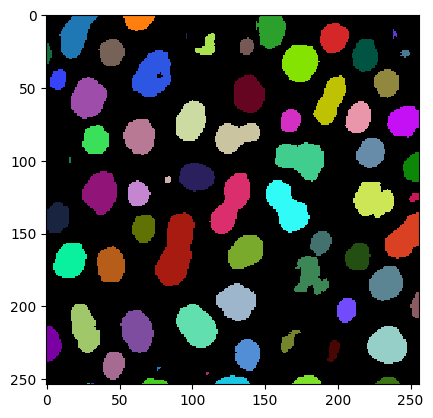

In [3]:
w.set("input", imread('https://samples.fiji.sc/blobs.png').squeeze())
result = w.get("segmented")

cle.imshow(result, labels=True)

C:\Users\rober\AppData\Local\Temp/ipykernel_33764/1092359316.py:12: UserWarning: Overwriting input
  warnings.warn("Overwriting {}".format(name))


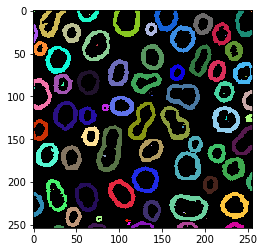

In [9]:
w.set("input", imread("C:/structure/data/blobs_edges.tif"))
result = w.get("segmented")

cle.imshow(result, labels=True)

In [3]:
trib = imread("https://zenodo.org/records/5837363/files/lund_i000000_oi_000000.tif?download=1")

In [6]:
trib.shape

(71, 1024, 512)

array([[134, 134, 128, ..., 136, 146, 130],
       [134, 135, 135, ..., 133, 136, 141],
       [137, 142, 138, ..., 140, 146, 130],
       ...,
       [120, 108, 125, ..., 135, 137, 148],
       [124, 120, 116, ..., 133, 132, 138],
       [120, 125, 124, ..., 136, 130, 131]], dtype=uint16, mtype=buffer)
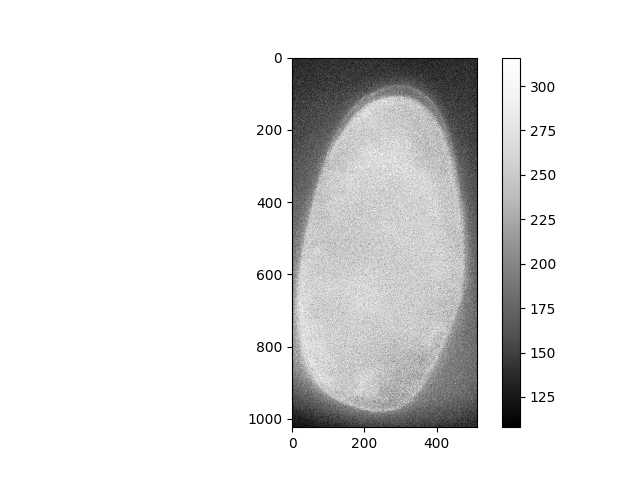
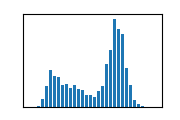

In [8]:
trib = cle.push(trib)
trib[25]